# Capstone Project - Battle Of Neighborhoods

## This is the capstone project for the IBM Data Science Professional Certificate
### Open new Mexican Restaurant in London, United Kingdom

### 1. Introduction/Business Problem:

In [2]:
# 1. A description of the problem and a discussion of the background

London is the capital and largest city of England and the United Kingdom. It is the third-most populous in Europe. London has a diverse range of people and cultures, and more than 300 languages are spoken in the region.  It offers many business opportunities, like openning new restaurants so is competitive. Careful consideration of analysis for the business expansion is so much important as it is directly proportional to the cost of the business. The analysis from this report help for the new businesses strategically target the market and help in a high return on investment so is low risk. 

Opening a new restaurant can be daunting. There are so many things to consider from choosing the right location to finding the financing to selecting the right name. As the location is one of the main factors in opening a new restaurant we will focus on the restaurant business around the London area in this report. The first step in opening a new restaurant is deciding what type of restaurant it is going to be? Because that's already decided and it's going to be a specific type of cuisine i.e Mexican restaurant, now choosing the location of the restaurant is one of the most imortant decisions. Will it be in a busy area with plenty of foot traffic, or is there enough parking or are there any other restaurants opened or closed in the same spot?
We will focus on the neighborhoods that has no or least Mexican restaurants, also will take into consideration (with help of clustering) which neighbourhoods are similar and most like Mexican food but at the sam time has no or very little Mexican restaurants. Then I will hopefully come to a conclusion where it is a good place to open a new Mexican restaurant.

In [3]:
# 2. A description of the data and how it will be used to solve the problem

#### Target Audience:

The objective of my project is to recommend which neighborhood of London is a good choice for a new Mexican Restaurant business to open.

#### Methodology - How will I use the data to solve the described Business Problem:

- I will convert address data into their equivalent latitude and longitude values.
- For London neighborhood data, I will use the resource from wikipedia page , https://en.wikipedia.org/wiki/List_of_areas_of_London
- Use the Foursquare API to explore London neighborhoods and to get venues in neighborhoods.
- Use the Foursquare API to get venue ratings and likes in neighborhoods.
- Use the k-means clustering to complete clustering task
- Use the Folium library to visualize the neighborhoods, venues , clusters in London

### 2. Data section

 Download and Explore Borough Dataset

In [4]:
#install libraries 
!pip install geopy    
!pip install folium   
!pip install geocoder
print('Libraries installed')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.8 MB/s  eta 0:00:01
/opt/conda/envs/Python-3.7-main/

In [5]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import re

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

from bs4 import BeautifulSoup 

print('Libraries imported.')

Libraries imported.


#### Getting the latitude and longitude of London, United Kingdom

In [6]:
#get the coordinates of London
london_address = 'London, United Kingdom'

geolocator = Nominatim(user_agent='london_explorer')
location = geolocator.geocode(london_address)
latitude = location.latitude
longitude = location.longitude
london_center = [latitude, longitude ]

print('The geographical coordiantes of {} are {}, {}'.format(london_address, latitude, longitude))

The geographical coordiantes of London, United Kingdom are 51.5073219, -0.1276474


##### Getting the boroughs data of London

I will be using the wikipedia page https://en.wikipedia.org/wiki/List_of_London_boroughs to get the data for 32 London boroughs and the City of London. The City of London is the 33rd principal division of Greater London but it is not a London borough, so it's not in the table that I'll be using, but I will manualy add the City of London as the 33th borough so that I can do a more extensive analysis.

In [7]:
# Read London borough data 
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
source=requests.get(url).text
soup=BeautifulSoup(source, 'html.parser')

In [8]:
# Get the whole table that we need from the wikipedia page and put it in a dataframe format
table = soup.find('table', class_="wikitable sortable")

df = pd.read_html(str(table))
df = pd.concat(df)

In [9]:
df

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham[note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [10]:
# Data cleansing, extract only the latitude and longitude (last 18 charachters) from the Co-ordinates column
i=0
for i in range(32):
    df['Co-ordinates'][i]= df['Co-ordinates'][i][-18:]
    i=i+1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
# Droping the columns that i don't need
df=df.drop(columns=['Inner', 'Status', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', 'Population (2019 est)[1]', 'Nr. in map'])

In [12]:
# Check the dataframe
df

,Borough,Co-ordinates
0,Barking and Dagenham[note 1],51.5607°N 0.1557°E
1,Barnet,51.6252°N 0.1517°W
2,Bexley,51.4549°N 0.1505°E
3,Brent,51.5588°N 0.2817°W
4,Bromley,51.4039°N 0.0198°E
5,Camden,51.5290°N 0.1255°W
6,Croydon,51.3714°N 0.0977°W
7,Ealing,51.5130°N 0.3089°W
8,Enfield,51.6538°N 0.0799°W
9,Greenwich [note 2],51.4892°N 0.0648°E


In [13]:
# Add two columns for latitude and longitude, so that I can divide the coordiantes from 'Co-ordinates' column
df["Latitude"] = ""
df['Longitude']= ""

In [14]:
# Remove square brackets and the text within
j=0
for j in range(32):
    df['Borough'][j]=re.sub("[\(\[].*?[\)\]]", "", df['Borough'][j])
    j=j+1

In [15]:
df

,Borough,Co-ordinates,Latitude,Longitude
0,Barking and Dagenham,51.5607°N 0.1557°E,,
1,Barnet,51.6252°N 0.1517°W,,
2,Bexley,51.4549°N 0.1505°E,,
3,Brent,51.5588°N 0.2817°W,,
4,Bromley,51.4039°N 0.0198°E,,
5,Camden,51.5290°N 0.1255°W,,
6,Croydon,51.3714°N 0.0977°W,,
7,Ealing,51.5130°N 0.3089°W,,
8,Enfield,51.6538°N 0.0799°W,,
9,Greenwich,51.4892°N 0.0648°E,,


In [16]:
# Fill the two new columns with the latitude and longitude from 'Co-ordinates columns, take only the numbers (without nonnumerich characters)
k=0
for k in range(32):
    df['Latitude'][k]=df['Co-ordinates'][k].split()[0][:7]
    if df['Co-ordinates'][k].split()[1][-1] == 'W':
        df['Longitude'][k]='-' + df['Co-ordinates'][k].split()[1][:6]
    else:
        df['Longitude'][k]=df['Co-ordinates'][k].split()[1][:6]    
    k=k+1

In [17]:
#Check the dataframe
df

,Borough,Co-ordinates,Latitude,Longitude
0,Barking and Dagenham,51.5607°N 0.1557°E,51.5607,0.1557
1,Barnet,51.6252°N 0.1517°W,51.6252,-0.1517
2,Bexley,51.4549°N 0.1505°E,51.4549,0.1505
3,Brent,51.5588°N 0.2817°W,51.5588,-0.2817
4,Bromley,51.4039°N 0.0198°E,51.4039,0.0198
5,Camden,51.5290°N 0.1255°W,51.5290,-0.1255
6,Croydon,51.3714°N 0.0977°W,51.3714,-0.0977
7,Ealing,51.5130°N 0.3089°W,51.5130,-0.3089
8,Enfield,51.6538°N 0.0799°W,51.6538,-0.0799
9,Greenwich,51.4892°N 0.0648°E,51.4892,0.0648


In [18]:
# Drop the columns 'Co-ordinates' because I don't need it anymore
df.drop('Co-ordinates', 1, inplace=True)

In [19]:
# As I mention on the start City of London is not is the table because is't not consoderd a borough, but I add it manually so that I can take in into consideration when I'll we doing the data analysis later
df.append({'Borough':'City of London', 'Latitude': '51.5155', 'Longitude': 0.0922}, ignore_index=True)

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,Ealing,51.5130,-0.3089
8,Enfield,51.6538,-0.0799
9,Greenwich,51.4892,0.0648


In [20]:
# create map of London boroughs using latitude and longitude values
map_london= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

## 2. Load Venues and Analyze Boroughs in London

 We will use Foursquare API for getting venues of boroughs

#### Explore Venues of London boroughs

##### My credentails for using the Foursquare API

In [21]:
CLIENT_ID = 'W2JBYYSD3LGATRHAYH2DVJIBWTOWVN5NUFC3PMTF23CKVM10'
CLIENT_SECRET = 'ZGF4JEFSAEVATIRXQAZNXNZDOIMG5GHV4RANVTA4W3EOKESK'
VERSION = '20180604'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W2JBYYSD3LGATRHAYH2DVJIBWTOWVN5NUFC3PMTF23CKVM10
CLIENT_SECRET:ZGF4JEFSAEVATIRXQAZNXNZDOIMG5GHV4RANVTA4W3EOKESK


In [22]:
LIMIT = 100

def getBoroughVenues( latitude, longitude,borough, radius=1000 ):
    venues = []
    for lat, long, borough in zip(latitude, longitude ,borough):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                borough,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Borough', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

borough_venues = getBoroughVenues (df['Latitude'], df['Longitude'], df['Borough'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(borough_venues['VenueCategory'].unique())))
borough_venues.head()

There are 261 unique venue categories. Some of them are as below:


,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Barking and Dagenham,51.5607,0.1557,Central Park,4ac518f8f964a520d6af20e3,51.559560,0.161981,452,Park
1,Barking and Dagenham,51.5607,0.1557,Lara Grill,50baf653183fee49a8b0b4cc,51.562445,0.147178,620,Turkish Restaurant
2,Barking and Dagenham,51.5607,0.1557,Iceland,50b1f711e4b0216227c808d4,51.560578,0.147685,554,Grocery Store
3,Barking and Dagenham,51.5607,0.1557,Shell,50c986cbe4b05a3aac4c5bc6,51.560415,0.148364,508,Gas Station
4,Barking and Dagenham,51.5607,0.1557,B&M Store,513f3d99e4b02bc64cba680d,51.565287,0.143793,969,Discount Store


In [23]:
print('Top 10 distinct venue counts are as below')
borough_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Pub,176
Coffee Shop,174
Café,91
Hotel,78
Clothing Store,69
Park,65
Italian Restaurant,60
Grocery Store,54
Supermarket,52


In [24]:
restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint', 'Steakhouse','Breakfast Spot','Food Court','Deli / Bodega', 'Wine Bar','Sandwich Place', 'Burrito Place','Pizza Place']
mexican_restaurant_list = ['Mexican Restaurant', 'Latin American Restaurant']

# Filter restaurants 
    
borough_venues['RestFlag']=False
for restCat in restaurant_list:
    borough_venues['RestFlag'] = borough_venues['RestFlag'] | borough_venues['VenueCategory'].str.contains(restCat)
    
borough_restaurants = borough_venues[borough_venues['RestFlag'] == True].iloc[:,:-1]
mexican_restaurants = borough_restaurants[ borough_restaurants['VenueCategory'].isin(mexican_restaurant_list) ]
other_restaurants = borough_restaurants[ ~borough_restaurants['VenueCategory'].isin(mexican_restaurant_list) ]

print('Total number of restaurants:', len(borough_restaurants['VenueId'].unique()))
print('Total number of Mexican restaurants:', len(mexican_restaurants['VenueId'].unique()))
print('Percentage of Mexican restaurants: {:.2f}%'.format(len(mexican_restaurants['VenueId'].unique()) / len(borough_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 722
Total number of Mexican restaurants: 9
Percentage of Mexican restaurants: 1.25%


26 boroughss do not have any Mexican restaurant


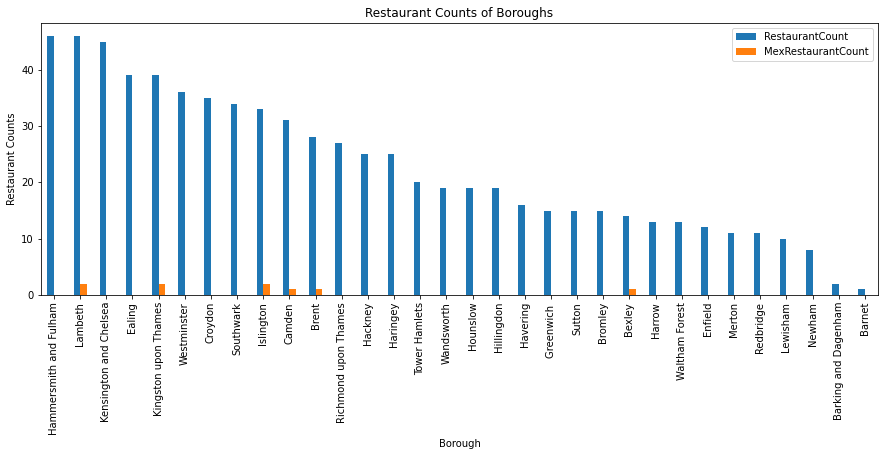

In [25]:
# get counts of restaurants in each Borough
df_rest_counts =  borough_restaurants.groupby(['Borough']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find boroughs that does not have any restaurant 
noRestList = list(set(borough_venues['Borough']) - set(borough_restaurants['Borough']))

#if exists , append boroughs without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Borough' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Borough'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Mexican restaurants in each Borough
df_mex_rest_counts =  mexican_restaurants.groupby(['Borough']).count().rename(columns={"VenueCategory": "MexRestaurantCount"})[['MexRestaurantCount']]

#find borough that does not have any restaurant 
noRestList = list(set(borough_venues['Borough']) - set(mexican_restaurants['Borough']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_mex_rest_counts = df_mex_rest_counts.append (pd.DataFrame( {'Borough' : noRestList  , 'MexRestaurantCount': [0] * len(noRestList) } ).set_index('Borough'))

df_mex_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_mex_rest_counts).set_index('Borough')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} boroughss do not have any Mexican restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','MexRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Boroughs')
plt.xlabel('Borough')
plt.ylabel('Restaurant Counts')
plt.show()

In [26]:
mexican_borough_venues=pd.DataFrame(columns=['Borough','Latitude','Longitude','VenueName','VenueId','VenueLatitude','VenueLongitude','VenueDistance','VenueCategory'])
i=0
for venue in borough_venues['VenueCategory']:
    if venue == 'Mexican Restaurant' or venue == 'Latin American Restaurant':
        mexican_borough_venues.loc[j]=borough_venues.loc[i]
        j=j+1
    i=i+1
mexican_borough_venues

,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
32,Bexley,51.4549,0.1505,Cafe Mojito,4c2ba839b34ad13a6922eace,51.457206,0.139611,797,Mexican Restaurant
33,Brent,51.5588,-0.2817,Las Iguanas,5269785811d21ed3ff95f5fc,51.556443,-0.283967,305,Latin American Restaurant
34,Camden,51.5290,-0.1255,Decimo,5da273c41be55d000714136f,51.529627,-0.124469,99,Mexican Restaurant
35,Islington,51.5416,-0.1022,El Inca Plebeyo,55f9e045498ec7b6616f0f9c,51.539989,-0.096824,413,Latin American Restaurant
36,Islington,51.5416,-0.1022,Wahaca,519e1eb3498ef909d6824120,51.536015,-0.103972,633,Mexican Restaurant
37,Kingston upon Thames,51.4085,-0.3064,Las Iguanas,4fc8ab7fe4b042a57f02c0d2,51.407440,-0.307500,140,Latin American Restaurant
38,Kingston upon Thames,51.4085,-0.3064,Chez Lalee,4b76f668f964a520026f2ee3,51.409030,-0.307023,73,Mexican Restaurant
39,Lambeth,51.4607,-0.1163,El Rancho De Lalo,4d02335b18ff8cfaae50c357,51.462187,-0.111650,362,Latin American Restaurant
40,Lambeth,51.4607,-0.1163,Jalisco,527eb0fd11d2fd345506fd47,51.462112,-0.111410,373,Mexican Restaurant


We can see from the graph that there are 6 boroughs that has Mexican or Latin American Restaurant. Also we can see that borough Kensinngton and Chelsea doesn't have any Mexican or Latin American Restaurant, but have the most restourants from all the boruough in London, in the oposite Barnet borough has the least number of restourants and also doesn't have any Mexican or Latin American Restaurant

In [27]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
       
        raitings.append((venueId, rating,likes))
 
     #convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(mexican_borough_venues['VenueId'].drop_duplicates())
restaurants_raitings

,VenueId,VenueRating,VenueLikes
0,4c2ba839b34ad13a6922eace,5.8,6
1,5269785811d21ed3ff95f5fc,7.4,36
2,5da273c41be55d000714136f,7.5,8
3,55f9e045498ec7b6616f0f9c,8.3,30
4,519e1eb3498ef909d6824120,8.4,194
5,4fc8ab7fe4b042a57f02c0d2,7.5,47
6,4b76f668f964a520026f2ee3,7.1,14
7,4d02335b18ff8cfaae50c357,8.0,22
8,527eb0fd11d2fd345506fd47,7.1,24


In [28]:
#merge raitings to restaurants 
mexican_borough_restaurants = mexican_restaurants.merge(restaurants_raitings)
mexican_borough_restaurants

,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Bexley,51.4549,0.1505,Cafe Mojito,4c2ba839b34ad13a6922eace,51.457206,0.139611,797,Mexican Restaurant,5.8,6
1,Brent,51.5588,-0.2817,Las Iguanas,5269785811d21ed3ff95f5fc,51.556443,-0.283967,305,Latin American Restaurant,7.4,36
2,Camden,51.5290,-0.1255,Decimo,5da273c41be55d000714136f,51.529627,-0.124469,99,Mexican Restaurant,7.5,8
3,Islington,51.5416,-0.1022,El Inca Plebeyo,55f9e045498ec7b6616f0f9c,51.539989,-0.096824,413,Latin American Restaurant,8.3,30
4,Islington,51.5416,-0.1022,Wahaca,519e1eb3498ef909d6824120,51.536015,-0.103972,633,Mexican Restaurant,8.4,194
5,Kingston upon Thames,51.4085,-0.3064,Las Iguanas,4fc8ab7fe4b042a57f02c0d2,51.407440,-0.307500,140,Latin American Restaurant,7.5,47
6,Kingston upon Thames,51.4085,-0.3064,Chez Lalee,4b76f668f964a520026f2ee3,51.409030,-0.307023,73,Mexican Restaurant,7.1,14
7,Lambeth,51.4607,-0.1163,El Rancho De Lalo,4d02335b18ff8cfaae50c357,51.462187,-0.111650,362,Latin American Restaurant,8.0,22
8,Lambeth,51.4607,-0.1163,Jalisco,527eb0fd11d2fd345506fd47,51.462112,-0.111410,373,Mexican Restaurant,7.1,24


In [29]:
# create map of London boroughs which have mexican restaurants using latitude and longitude values
map_london_mexican= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  borough in zip(mexican_borough_restaurants['VenueLatitude'], mexican_borough_restaurants['VenueLongitude'], mexican_borough_restaurants['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_mexican)  
    
map_london_mexican

From the table with ratings and likes we can see that London borough _**Islington**_ has two Mexican/Latin American restaurants and has the biggest ratings and number of likes. 

In [58]:
london_center = [latitude, longitude]
map_restaurant= folium.Map(location=london_center, zoom_start=12)
df_borough_no_mex_rest = df[df['Borough'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_london) 
HeatMap(borough_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
#folium.Marker(london_center).add_to(map_london)
#folium.Circle(london_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
#folium.Circle(london_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
#folium.Circle(london_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
#folium.Circle(london_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig, name in zip(mexican_borough_restaurants['VenueLatitude'], mexican_borough_restaurants['VenueLongitude'], mexican_borough_restaurants['Borough'], mexican_borough_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#b72c33',
        fill_opacity=0.7).add_to(map_restaurant)
       
raiting_lt_7 = mexican_borough_restaurants[mexican_borough_restaurants['VenueRating'] <7.5]
for lat, lon, neig, name in zip(raiting_lt_7['VenueLatitude'], raiting_lt_7['VenueLongitude'], raiting_lt_7['Borough'], raiting_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3139cc',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

From the heat map we can see that in the **northern** part of the city of London there is **no Mexican/Latin American restaurants with rating less than 7**.

In [31]:
borough_venues.head()

,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
0,Barking and Dagenham,51.5607,0.1557,Central Park,4ac518f8f964a520d6af20e3,51.559560,0.161981,452,Park,False
1,Barking and Dagenham,51.5607,0.1557,Lara Grill,50baf653183fee49a8b0b4cc,51.562445,0.147178,620,Turkish Restaurant,True
2,Barking and Dagenham,51.5607,0.1557,Iceland,50b1f711e4b0216227c808d4,51.560578,0.147685,554,Grocery Store,False
3,Barking and Dagenham,51.5607,0.1557,Shell,50c986cbe4b05a3aac4c5bc6,51.560415,0.148364,508,Gas Station,False
4,Barking and Dagenham,51.5607,0.1557,B&M Store,513f3d99e4b02bc64cba680d,51.565287,0.143793,969,Discount Store,False


In [32]:
no_duplicates_borough_venues=borough_venues.drop_duplicates(subset='Borough')
no_duplicates_borough_venues

,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
0,Barking and Dagenham,51.5607,0.1557,Central Park,4ac518f8f964a520d6af20e3,51.559560,0.161981,452,Park,False
17,Barnet,51.6252,-0.1517,The Osidge Arms,4e072c1d8877394591e45bd6,51.631986,-0.143123,960,Pub,False
27,Bexley,51.4549,0.1505,Zizzi,4e8367d5be7bdd8e4e80dcf7,51.455929,0.150555,114,Italian Restaurant,True
75,Brent,51.5588,-0.2817,Bobby Moore Statue,4eb520a8722e578a4f4c1499,51.557416,-0.279635,210,Outdoor Sculpture,False
166,Bromley,51.4039,0.0198,Marks & Spencer,4b094517f964a520181523e3,51.404017,0.015718,283,Department Store,False
228,Camden,51.5290,-0.1255,The Sir John Ritblat Gallery: Treasures of the...,4daeaa490437710b8137b098,51.529666,-0.127541,159,Museum,False
328,Croydon,51.3714,-0.0977,The Ludoquist,5a02c6a2b1538e5725b84eac,51.371530,-0.100331,183,Gaming Cafe,False
415,Ealing,51.5130,-0.3089,Artisan Coffee,5403335b498e46786b2ff5ef,51.513024,-0.306655,155,Coffee Shop,False
515,Enfield,51.6538,-0.0799,Goodlooking Optics,4c84fc6e2f1c236af8445043,51.652223,-0.079490,177,Optical Shop,False
579,Greenwich,51.4892,0.0648,Kailash Momo Restaurant,4ef2461b93adff223e479e05,51.488990,0.067385,180,Asian Restaurant,True


In [33]:
list1=mexican_borough_restaurants['Borough']
no_duplicates_borough_venues_indexReset=no_duplicates_borough_venues.set_index('Borough')

In [34]:
no_duplicates_borough_venues_indexReset

,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
Borough,,,,,,,,,
Barking and Dagenham,51.5607,0.1557,Central Park,4ac518f8f964a520d6af20e3,51.559560,0.161981,452,Park,False
Barnet,51.6252,-0.1517,The Osidge Arms,4e072c1d8877394591e45bd6,51.631986,-0.143123,960,Pub,False
Bexley,51.4549,0.1505,Zizzi,4e8367d5be7bdd8e4e80dcf7,51.455929,0.150555,114,Italian Restaurant,True
Brent,51.5588,-0.2817,Bobby Moore Statue,4eb520a8722e578a4f4c1499,51.557416,-0.279635,210,Outdoor Sculpture,False
Bromley,51.4039,0.0198,Marks & Spencer,4b094517f964a520181523e3,51.404017,0.015718,283,Department Store,False
Camden,51.5290,-0.1255,The Sir John Ritblat Gallery: Treasures of the...,4daeaa490437710b8137b098,51.529666,-0.127541,159,Museum,False
Croydon,51.3714,-0.0977,The Ludoquist,5a02c6a2b1538e5725b84eac,51.371530,-0.100331,183,Gaming Cafe,False
Ealing,51.5130,-0.3089,Artisan Coffee,5403335b498e46786b2ff5ef,51.513024,-0.306655,155,Coffee Shop,False
Enfield,51.6538,-0.0799,Goodlooking Optics,4c84fc6e2f1c236af8445043,51.652223,-0.079490,177,Optical Shop,False


In [35]:
no_duplicates_borough_venues_no_mex=no_duplicates_borough_venues_indexReset.drop(list1)

In [36]:
no_duplicates_borough_venues_no_mex.reset_index(inplace=True)

In [37]:
no_duplicates_borough_venues_no_mex

,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
0,Barking and Dagenham,51.5607,0.1557,Central Park,4ac518f8f964a520d6af20e3,51.559560,0.161981,452,Park,False
1,Barnet,51.6252,-0.1517,The Osidge Arms,4e072c1d8877394591e45bd6,51.631986,-0.143123,960,Pub,False
2,Bromley,51.4039,0.0198,Marks & Spencer,4b094517f964a520181523e3,51.404017,0.015718,283,Department Store,False
3,Croydon,51.3714,-0.0977,The Ludoquist,5a02c6a2b1538e5725b84eac,51.371530,-0.100331,183,Gaming Cafe,False
4,Ealing,51.5130,-0.3089,Artisan Coffee,5403335b498e46786b2ff5ef,51.513024,-0.306655,155,Coffee Shop,False
5,Enfield,51.6538,-0.0799,Goodlooking Optics,4c84fc6e2f1c236af8445043,51.652223,-0.079490,177,Optical Shop,False
6,Greenwich,51.4892,0.0648,Kailash Momo Restaurant,4ef2461b93adff223e479e05,51.488990,0.067385,180,Asian Restaurant,True
7,Hackney,51.5450,-0.0553,Hackney Picturehouse,4dc91970b0fbf26798c2c42c,51.544841,-0.055399,18,Movie Theater,False
8,Hammersmith and Fulham,51.4927,-0.2339,eat TOKYO,509c2eeb498efdffc571b983,51.492641,-0.232788,77,Japanese Restaurant,True
9,Haringey,51.6000,-0.1119,The Prince,4c6868b27963be9a3478cdbc,51.601111,-0.116143,318,Bar,False


In [38]:
# create map of London boroughs which do not have mexican restaurants using latitude and longitude values
map_london_no_mexican= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  borough in zip(no_duplicates_borough_venues_no_mex['VenueLatitude'], no_duplicates_borough_venues_no_mex['VenueLongitude'], no_duplicates_borough_venues_no_mex['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_no_mexican)  
    
    
map_london_no_mexican

## 3. Cluster Boroughs using k-means

In [39]:
borough_venues.head()

,Borough,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
0,Barking and Dagenham,51.5607,0.1557,Central Park,4ac518f8f964a520d6af20e3,51.559560,0.161981,452,Park,False
1,Barking and Dagenham,51.5607,0.1557,Lara Grill,50baf653183fee49a8b0b4cc,51.562445,0.147178,620,Turkish Restaurant,True
2,Barking and Dagenham,51.5607,0.1557,Iceland,50b1f711e4b0216227c808d4,51.560578,0.147685,554,Grocery Store,False
3,Barking and Dagenham,51.5607,0.1557,Shell,50c986cbe4b05a3aac4c5bc6,51.560415,0.148364,508,Gas Station,False
4,Barking and Dagenham,51.5607,0.1557,B&M Store,513f3d99e4b02bc64cba680d,51.565287,0.143793,969,Discount Store,False


In [40]:
# one hot encoding
london_onehot = pd.get_dummies(borough_venues[['VenueCategory']], prefix="", prefix_sep="")

# add borough column back to dataframe
london_onehot['Borough'] = borough_venues['Borough'] 

# move borough column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Currency Exchange,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsagent,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
london_onehot.shape

(2228, 262)

In [42]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Currency Exchange,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsagent,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [43]:
london_grouped.shape

(32, 262)

In [44]:
num_top_venues = 5

for borough in london_grouped['Borough']:
    print("----"+borough+"----")
    temp = london_grouped[london_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                 venue  freq
0             Bus Stop  0.12
1  Martial Arts School  0.06
2          Bus Station  0.06
3          Sports Club  0.06
4          Gas Station  0.06


----Barnet----
               venue  freq
0               Park   0.3
1                Pub   0.2
2           Bus Stop   0.1
3  Fish & Chips Shop   0.1
4  Electronics Store   0.1


----Bexley----
                  venue  freq
0                   Pub  0.12
1        Clothing Store  0.10
2  Fast Food Restaurant  0.06
3                 Hotel  0.06
4           Coffee Shop  0.06


----Brent----
                 venue  freq
0          Coffee Shop  0.09
1                  Bar  0.07
2                Hotel  0.07
3       Clothing Store  0.04
4  Sporting Goods Shop  0.04


----Bromley----
                  venue  freq
0        Clothing Store  0.10
1                   Pub  0.10
2           Coffee Shop  0.08
3  Gym / Fitness Center  0.05
4          Burger Joint  0.03


----Camden----
         venue  

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Park,Turkish Restaurant,Martial Arts School,Supermarket,Chinese Restaurant,Golf Course,Grocery Store,Gym / Fitness Center,Discount Store
1,Barnet,Park,Pub,Fish & Chips Shop,Bus Stop,Grocery Store,Electronics Store,Café,Flower Shop,Flea Market,Fish Market
2,Bexley,Pub,Clothing Store,Hotel,Coffee Shop,Fast Food Restaurant,Supermarket,Pharmacy,American Restaurant,Bowling Alley,Mexican Restaurant
3,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Indian Restaurant,Clothing Store,Café,Pizza Place,Grocery Store,American Restaurant
4,Bromley,Clothing Store,Pub,Coffee Shop,Gym / Fitness Center,Supermarket,Bar,Portuguese Restaurant,Electronics Store,Park,Burger Joint
5,Camden,Coffee Shop,Hotel,Café,Pub,Breakfast Spot,Bakery,Plaza,Bookstore,Cocktail Bar,Garden
6,Croydon,Coffee Shop,Pub,Hotel,Italian Restaurant,Clothing Store,Indian Restaurant,Platform,Mediterranean Restaurant,Fast Food Restaurant,Park
7,Ealing,Coffee Shop,Pub,Italian Restaurant,Bakery,Park,Café,Burger Joint,Pizza Place,Indian Restaurant,Thai Restaurant
8,Enfield,Pub,Coffee Shop,Clothing Store,Café,Supermarket,Grocery Store,Optical Shop,Gift Shop,Indian Restaurant,Department Store
9,Greenwich,Grocery Store,Pub,Coffee Shop,Supermarket,Clothing Store,Plaza,Pier,Pharmacy,Bakery,Hotel


In [47]:
# set number of clusters
kclusters = 4

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 0, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1,
       3, 3, 2, 1, 3, 2, 3, 1, 1, 3], dtype=int32)

In [48]:
df

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,Ealing,51.5130,-0.3089
8,Enfield,51.6538,-0.0799
9,Greenwich,51.4892,0.0648


In [49]:
#neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1)

In [60]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = df


london_merged = london_merged.join(borough_venues_sorted.set_index('Borough'), on='Borough')

london_merged

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,3,Bus Stop,Park,Turkish Restaurant,Martial Arts School,Supermarket,Chinese Restaurant,Golf Course,Grocery Store,Gym / Fitness Center,Discount Store
1,Barnet,51.6252,-0.1517,0,Park,Pub,Fish & Chips Shop,Bus Stop,Grocery Store,Electronics Store,Café,Flower Shop,Flea Market,Fish Market
2,Bexley,51.4549,0.1505,2,Pub,Clothing Store,Hotel,Coffee Shop,Fast Food Restaurant,Supermarket,Pharmacy,American Restaurant,Bowling Alley,Mexican Restaurant
3,Brent,51.5588,-0.2817,3,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Indian Restaurant,Clothing Store,Café,Pizza Place,Grocery Store,American Restaurant
4,Bromley,51.4039,0.0198,2,Clothing Store,Pub,Coffee Shop,Gym / Fitness Center,Supermarket,Bar,Portuguese Restaurant,Electronics Store,Park,Burger Joint
5,Camden,51.5290,-0.1255,3,Coffee Shop,Hotel,Café,Pub,Breakfast Spot,Bakery,Plaza,Bookstore,Cocktail Bar,Garden
6,Croydon,51.3714,-0.0977,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Clothing Store,Indian Restaurant,Platform,Mediterranean Restaurant,Fast Food Restaurant,Park
7,Ealing,51.5130,-0.3089,1,Coffee Shop,Pub,Italian Restaurant,Bakery,Park,Café,Burger Joint,Pizza Place,Indian Restaurant,Thai Restaurant
8,Enfield,51.6538,-0.0799,1,Pub,Coffee Shop,Clothing Store,Café,Supermarket,Grocery Store,Optical Shop,Gift Shop,Indian Restaurant,Department Store
9,Greenwich,51.4892,0.0648,2,Grocery Store,Pub,Coffee Shop,Supermarket,Clothing Store,Plaza,Pier,Pharmacy,Bakery,Hotel


In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [61]:
#Claster 0
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,0,Park,Pub,Fish & Chips Shop,Bus Stop,Grocery Store,Electronics Store,Café,Flower Shop,Flea Market,Fish Market


In [62]:
#Claster 1
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Ealing,1,Coffee Shop,Pub,Italian Restaurant,Bakery,Park,Café,Burger Joint,Pizza Place,Indian Restaurant,Thai Restaurant
8,Enfield,1,Pub,Coffee Shop,Clothing Store,Café,Supermarket,Grocery Store,Optical Shop,Gift Shop,Indian Restaurant,Department Store
10,Hackney,1,Pub,Café,Coffee Shop,Brewery,Bakery,Park,Vegetarian / Vegan Restaurant,Cocktail Bar,Pizza Place,Vietnamese Restaurant
11,Hammersmith and Fulham,1,Pub,Café,Coffee Shop,Indian Restaurant,Gastropub,Japanese Restaurant,Park,Sandwich Place,Thai Restaurant,Italian Restaurant
17,Islington,1,Pub,Café,Park,Gastropub,Coffee Shop,Bakery,Cocktail Bar,French Restaurant,Ice Cream Shop,Boutique
19,Kingston upon Thames,1,Coffee Shop,Café,Pub,Burger Joint,Thai Restaurant,Clothing Store,Italian Restaurant,Park,Department Store,Gym / Fitness Center
21,Lewisham,1,Supermarket,Coffee Shop,Park,Pub,Grocery Store,Italian Restaurant,Furniture / Home Store,Fast Food Restaurant,Shopping Plaza,Shopping Mall
25,Richmond upon Thames,1,Pub,Coffee Shop,Café,Grocery Store,Italian Restaurant,Park,Deli / Bodega,Pizza Place,French Restaurant,Boat or Ferry
29,Waltham Forest,1,Pub,Café,Brewery,Restaurant,Gym / Fitness Center,Art Gallery,Pizza Place,Park,Concert Hall,Coffee Shop
30,Wandsworth,1,Pub,Café,Coffee Shop,Grocery Store,Park,Gym / Fitness Center,Hotel,Pharmacy,Pizza Place,Supermarket


In [63]:
#Claster 2
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,2,Pub,Clothing Store,Hotel,Coffee Shop,Fast Food Restaurant,Supermarket,Pharmacy,American Restaurant,Bowling Alley,Mexican Restaurant
4,Bromley,2,Clothing Store,Pub,Coffee Shop,Gym / Fitness Center,Supermarket,Bar,Portuguese Restaurant,Electronics Store,Park,Burger Joint
6,Croydon,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Clothing Store,Indian Restaurant,Platform,Mediterranean Restaurant,Fast Food Restaurant,Park
9,Greenwich,2,Grocery Store,Pub,Coffee Shop,Supermarket,Clothing Store,Plaza,Pier,Pharmacy,Bakery,Hotel
12,Haringey,2,Pub,Clothing Store,Fast Food Restaurant,Turkish Restaurant,Café,Bakery,Coffee Shop,Pharmacy,Park,Chinese Restaurant
13,Harrow,2,Coffee Shop,Platform,Indian Restaurant,Clothing Store,Pharmacy,Sandwich Place,Fast Food Restaurant,Park,Burrito Place,Bus Stop
14,Havering,2,Coffee Shop,Pub,Clothing Store,Shopping Mall,Supermarket,Grocery Store,Café,Furniture / Home Store,Park,Fast Food Restaurant
15,Hillingdon,2,Coffee Shop,Pub,Clothing Store,Fast Food Restaurant,Pharmacy,Italian Restaurant,Gym,Grocery Store,Bar,Supermarket
16,Hounslow,2,Indian Restaurant,Coffee Shop,Hotel,Clothing Store,Grocery Store,Fast Food Restaurant,Bus Stop,Discount Store,Supermarket,Pub
24,Redbridge,2,Grocery Store,Coffee Shop,Clothing Store,Supermarket,Turkish Restaurant,Sandwich Place,Pub,Bakery,Gym / Fitness Center,Fast Food Restaurant


In [64]:
#Claster 3
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,3,Bus Stop,Park,Turkish Restaurant,Martial Arts School,Supermarket,Chinese Restaurant,Golf Course,Grocery Store,Gym / Fitness Center,Discount Store
3,Brent,3,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Indian Restaurant,Clothing Store,Café,Pizza Place,Grocery Store,American Restaurant
5,Camden,3,Coffee Shop,Hotel,Café,Pub,Breakfast Spot,Bakery,Plaza,Bookstore,Cocktail Bar,Garden
18,Kensington and Chelsea,3,Café,Pub,Coffee Shop,Juice Bar,Restaurant,Italian Restaurant,Garden,Hotel,Burger Joint,Clothing Store
20,Lambeth,3,Coffee Shop,Pub,Caribbean Restaurant,Pizza Place,Cocktail Bar,Tapas Restaurant,Market,Music Venue,Gym / Fitness Center,Beer Bar
22,Merton,3,Café,Supermarket,Park,Fast Food Restaurant,Bus Stop,Train Station,Pizza Place,Diner,Burger Joint,Bookstore
23,Newham,3,Hotel,Coffee Shop,Light Rail Station,Airport Lounge,Airport Service,Park,Sandwich Place,Rental Car Location,Bar,Rafting
26,Southwark,3,Coffee Shop,Hotel,Pub,Bakery,Scenic Lookout,Restaurant,Brewery,Garden,Bar,Tapas Restaurant
28,Tower Hamlets,3,Coffee Shop,Park,Hotel,Italian Restaurant,Bus Stop,Sandwich Place,Gym / Fitness Center,Hotel Bar,Pizza Place,Light Rail Station
31,Westminster,3,Hotel,Coffee Shop,Park,Theater,Café,Sandwich Place,Sushi Restaurant,Italian Restaurant,Garden,Restaurant


##### From the cluster categories abovе, we can see that:

**Claster 0**: <br>
- This cluster consist of only one borough and between its most common venues there are not a lot of restaurants.

**Claster 1**: <br>
- Has a lot of restaurants. Most common type of restaurants that can be noticed are: Indian, Chinese, Japanese, Thai restaurants, i.e., restaurants with Asian cuisine are dominant in this cluster. 
- So, the people in the boroughs in this cluster may not be that interested in Mexican food.

**Claster 2**: <br>
- The venues in this cluster have the most restaurants. Which indicate a highly competitive atmosphere. 
- We know that in borough Bexley there is a Mexican restaurant then in **Bromley** borough there is a Portuguese restaurant, so the people around in this area may be interested in this kind of food, so borough Bromley having no Mexican or Latin American restaurant but having the likes of the people for this kind of food may be a good location for new Mexican restaurant.

**Claster 3**: <br>
- The boroughs in this cluster have different kind of restaurants, and it can be said that the cuisines are mixed. 
- We know that borough Lambeth has two Mexican restaurants also we can notice that there is a Caribbean restaurant and Tapas restaurant too. This highly indicates that people in this borough like Mexican/Latin American cuisine but opening a new Mexican restaurant may not be a good idea, considering the competition.
In this cluster are 4 out of 6 boroughs that have Mexican restaurant, the borough Westminster which is in this cluster and is in the very center of the town can be considered as a good location for opening new Mexican restaurant.
.
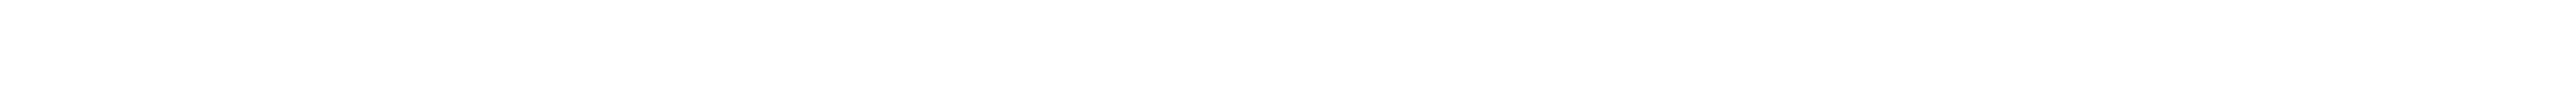

In [56]:
print(london_merged.groupby(['Cluster Labels','1st Most Common Venue' ]).count()[['Borough']].rename(columns={"Borough": "Borough Count"}))

london_merged.groupby(['Cluster Labels','2nd Most Common Venue' ]).count()[['Borough']].rename(columns={"Borough": "Borough Count"})

                                      Borough Count
Cluster Labels 1st Most Common Venue               
0              Park                               1
1              Coffee Shop                        2
               Pub                                7
               Supermarket                        1
2              Clothing Store                     2
               Coffee Shop                        4
               Grocery Store                      2
               Indian Restaurant                  1
               Pub                                2
3              Bus Stop                           1
               Café                               2
               Coffee Shop                        5
               Hotel                              2


Borough Count
Cluster Labels 2nd Most Common Venue               
0              Pub                                1
1              Café                               6
               Coffee Shop                        3
               Pub                                1
2              Café                               1
               Clothing Store                     2
               Coffee Shop                        2
               Platform                           1
               Pub                                5
3              Coffee Shop                        2
               Hotel                              3
               Park                               2
               Pub                                2
               Supermarket                        1